In [27]:
import pandas as pd
import numpy as np
import pydicom as pdc
from funcoes import path_arquivo

In [30]:
type(pa)

function

In [46]:
def path_arquivos2(path):
    path_n1 = path
    files_n1 = os.listdir(path_n1)
    path_imagens = dict()
    img_0 = dict()

    for arq1 in files_n1:
        path_n2 = path_n1 + '\\' + arq1
        files_n2 = os.listdir(path_n2)
        
        path_n3 = path_n2  + '\\' + files_n2[0]
        files_n3 = os.listdir(path_n3)

        path_n4 = path_n3  + '\\' + files_n3[0]
        files_n4 = os.listdir(path_n4);

        path_n5 = [path_n4  + '\\' + arquivo for arquivo in files_n4]
        path_imagens[f'{arq1}'] = path_n5

        img_0[f'{arq1}'] = (path_n5[0])
    return path_imagens, img_0

In [77]:
path = r'C:\Users\Lucas\Desktop\UFABC\TG\Bases'
path_imagens, img_0 = path_arquivos2(path)

In [36]:
colunas = ['Modality', 'Manufacturer', "Patient's Sex", "Patient's Weight", 'Slice Thickness', 'Data Collection Diameter', 'Reconstruction Diameter', 'Distance Source to Patient',
'X-Ray Tube Current', 'Rows', 'Columns', 'Pixel Spacing']

In [78]:

metadados = dict()

for i in img_0.keys():
    base = dict()
    ds = pdc.dcmread(img_0[i])
    for elem in ds:
        
        if elem.name in colunas:
            if elem.name == 'Pixel Spacing':
                a, b = elem.value
                c = str(a) + " x " + str(b)
                base[elem.name] = c
                
            else:
                base[elem.name] = elem.value
    metadados[f'{i}'] = base

In [79]:
df = pd.DataFrame.from_dict(metadados)
df = df.T

In [80]:
df.to_excel('Metadados_dataset.xlsx')

## Verificando Histograma

In [109]:
import seaborn as sb
import matplotlib.pyplot as plt

In [110]:
img = ds.pixel_array

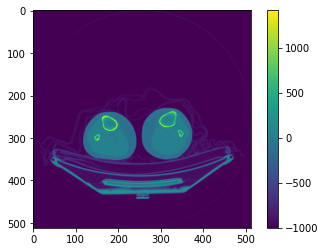

In [184]:
plt.imshow(img)
plt.colorbar()

In [123]:
print(np.sum(img[:,310]))

-340873


In [177]:
x, y = img.shape

def somatorio_dimensao(img, seleciona = 'coluna'):
    somatorio = []

    if seleciona == 'coluna':

        for coluna in range(y):
            soma = np.sum(img[:,coluna])
            somatorio.append(soma)
        return somatorio
        
    else:
        for linha in range(x):
            soma = np.sum(img[linha,:])
            somatorio.append(soma)
        return somatorio

In [178]:
soma_col = somatorio_dimensao(img)
soma_linha = somatorio_dimensao(img, 'linha')

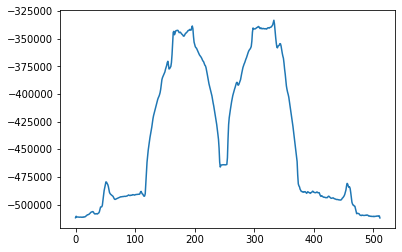

In [179]:
plt.plot(range(y), soma_col)

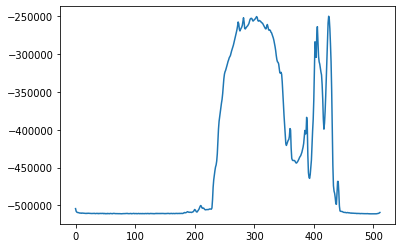

In [181]:
plt.plot(range(x), soma_linha)

In [174]:
def seleciona_perna(somatorio):
    maximo = np.where(np.max(somatorio) == somatorio)[0][0]
    somatorio2 = somatorio.copy()
    
    while maximo < y / 2:
        somatorio2[maximo] = -99999
        maximo = np.where(np.max(somatorio) == somatorio)[0][0]

    interval = maximo - 150;
    minimo = np.where(np.min(somatorio[interval:maximo]) == somatorio)[0][0]


#    minimo_dir = np.where(np.max(somatorio[minimo] - somatorio[maximo:]))[0][0]

    return minimo



In [182]:
mini_col = seleciona_perna(soma_col)
mini_row = seleciona_perna(soma_linha)


plt.imshow(img[mini_row:,mini_col:])

TypeError: slice indices must be integers or None or have an __index__ method